# Udacity Nanodegree: Data Science Foundations II
# Project II : Wrangling Data of WeRateDogs Twitter Account

### Student: Nelson Antonio Fernandes de Matos

## Table of Contents
<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#store">Store</a></li>
<li><a href="#visualize">Visualize and Analyze</a></li>
<li><a href="#conclusion">Conclusion</a></li>    
</ul>

<a id='introduction'></a>
## Introduction

This project is a step to fulfill the requirements of Udacity's Data Science Foundation 2 Nanodegree. 

Data of <a href = "https://twitter.com/dog_rates">WeRateDogs</a> Twitter account will be gathered in three distinct ways:

* By reading the file `twitter-archive-enhanced.csv` provided by Udacity. This file contains basic tweet data.    
* By downloading the file `image_predictions.tsv` programmatically. This file contains predictions of dog's breeds based on their photos.
* By using the tweepy library to gather data from WeRateDogs Twitter account. Each JSON tweet data will be stored in a flat file, in which each line will correspond to one tweet.

All gathered data will be read into Pandas data frames. The data frames will be assessed, cleaned and stored on *.csv and *db files. 

After all, some exploratory data analyses will be performed and some visualizations will be provided using dogs ratings, number of favorites, number of retweets and breeds.

In [1]:
# Import modules:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import requests, tweepy, json, time, os
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gather'></a>
## Gather

Read the file `twitter-archive-enhanced.csv` which was downloaded manually from Udacity <a href = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv">page</a>, into a Pandas dataframe.

In [2]:
twt_arch = pd.read_csv("twitter-archive-enhanced.csv")

Download programmatically, using  *requests* library, the image predicition file (`image_predictions.tsv`) hosted on Udacity's servers at the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In order to not request every time the notebook is run, the gathering will be performed only if the file image_prediction.tsv does not exist (the first time this cell is run).

In [3]:
if not (os.path.isfile("image_predicition.tsv")):
    url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    response = requests.get(url)
    with open('image_predicition.tsv', mode='wb') as file:
        file.write(response.content)

Read the file `image_prediction.tsv` into a Pandas dataframe:

In [4]:
pred = pd.read_csv('image_predicition.tsv', sep='\t')

Use tweepy library to download all data from tweets.    
API reference page: http://docs.tweepy.org/en/v3.5.0/api.html

In [5]:
# Keys and tokens. 
# Keys, secret keys and access tokens management.

# Consumer API keys:
consumer_key = 'API_KEY' # (API key)
consumer_secret = 'API_SECRET_KEY' # (API secret key)

# Access token & access token secret:
access_token = 'ACCESS_TOKEN' # (Access token)
access_secret = 'ACCESS_TOKEN_SECRET' # (Access token secret)

In order to not request Twitter servers every time the notebook is run - what would imply in a great loss of time - the gathering will be performed only if the file `tweet_json.txt` does not exist (the first time this cell is run).    
The tweet ids which return errors will be stored in a list, which will and then be saved to a file, so the data could be accessed without running all the gathering process again.

In [6]:
tweets_fails = [] # List to store ids of tweets in which tweepy returned erros.

if not (os.path.isfile("tweet_json.txt")):
    # Initialize API and some parameters:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
    
    # Get the data
    print(">>> Gathering Twitter Data STARTED  at: {}\n".format(time.ctime()))
    with open("tweet_json.txt", 'w', encoding="utf8") as tf: # open the file tweet_json.txt
        for i, tweet_id in enumerate(twt_arch['tweet_id']):
            start = time.time() # save start time
            #
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended') # get the tweet data    
                json.dump(tweet._json, tf) # write tweet data to the file
                tf.write("\n") # jumps to the next line of the file
                status = 'SUCCESS'
            except tweepy.TweepError as err:
                status = 'FAIL'
                tweets_fails.append(tweet_id)                
            #
            end = time.time() # save end time
            elapsed = end-start # Calculate elapsed time
            print("> {:5} - tweet id: {} - elapsed time: {:2.4}s - status: {:7}"
                  .format(i, tweet_id, elapsed, status)) # Print status
            #
    print("\n>>> Gathering Twitter Data FINISHED at: {}\n".format(time.ctime()))    

>>> Gathering Twitter Data STARTED  at: Sun May 17 17:52:56 2020

>     0 - tweet id: 892420643555336193 - elapsed time: 0.2996s - status: SUCCESS
>     1 - tweet id: 892177421306343426 - elapsed time: 0.2996s - status: SUCCESS
>     2 - tweet id: 891815181378084864 - elapsed time: 0.2796s - status: SUCCESS
>     3 - tweet id: 891689557279858688 - elapsed time: 0.2477s - status: SUCCESS
>     4 - tweet id: 891327558926688256 - elapsed time: 0.2796s - status: SUCCESS
>     5 - tweet id: 891087950875897856 - elapsed time: 0.2756s - status: SUCCESS
>     6 - tweet id: 890971913173991426 - elapsed time: 0.2996s - status: SUCCESS
>     7 - tweet id: 890729181411237888 - elapsed time: 0.3275s - status: SUCCESS
>     8 - tweet id: 890609185150312448 - elapsed time: 0.2956s - status: SUCCESS
>     9 - tweet id: 890240255349198849 - elapsed time: 0.2796s - status: SUCCESS
>    10 - tweet id: 890006608113172480 - elapsed time: 0.2716s - status: SUCCESS
>    11 - tweet id: 889880896479866881 - el

Rate limit reached. Sleeping for: 623


>   901 - tweet id: 758474966123810816 - elapsed time: 628.4s - status: SUCCESS
>   902 - tweet id: 758467244762497024 - elapsed time: 0.6391s - status: SUCCESS
>   903 - tweet id: 758405701903519748 - elapsed time: 0.5952s - status: SUCCESS
>   904 - tweet id: 758355060040593408 - elapsed time: 0.5872s - status: SUCCESS
>   905 - tweet id: 758099635764359168 - elapsed time: 0.5832s - status: SUCCESS
>   906 - tweet id: 758041019896193024 - elapsed time: 0.6072s - status: SUCCESS
>   907 - tweet id: 757741869644341248 - elapsed time: 0.6431s - status: SUCCESS
>   908 - tweet id: 757729163776290825 - elapsed time: 0.6112s - status: SUCCESS
>   909 - tweet id: 757725642876129280 - elapsed time: 0.5912s - status: SUCCESS
>   910 - tweet id: 757611664640446465 - elapsed time: 0.6151s - status: SUCCESS
>   911 - tweet id: 757597904299253760 - elapsed time: 0.6032s - status: SUCCESS
>   912 - tweet id: 757596066325864448 - elapsed time: 0.5992s - status: SUCCESS
>   913 - tweet id: 757400162

Rate limit reached. Sleeping for: 352


>  1801 - tweet id: 676957860086095872 - elapsed time: 357.8s - status: SUCCESS
>  1802 - tweet id: 676949632774234114 - elapsed time: 0.6311s - status: SUCCESS
>  1803 - tweet id: 676948236477857792 - elapsed time: 0.5952s - status: SUCCESS
>  1804 - tweet id: 676946864479084545 - elapsed time: 0.5793s - status: SUCCESS
>  1805 - tweet id: 676942428000112642 - elapsed time: 0.5833s - status: SUCCESS
>  1806 - tweet id: 676936541936185344 - elapsed time: 0.5713s - status: SUCCESS
>  1807 - tweet id: 676916996760600576 - elapsed time: 0.6232s - status: SUCCESS
>  1808 - tweet id: 676897532954456065 - elapsed time: 0.6352s - status: SUCCESS
>  1809 - tweet id: 676864501615042560 - elapsed time: 0.6112s - status: SUCCESS
>  1810 - tweet id: 676821958043033607 - elapsed time: 0.5952s - status: SUCCESS
>  1811 - tweet id: 676819651066732545 - elapsed time: 0.5912s - status: SUCCESS
>  1812 - tweet id: 676811746707918848 - elapsed time: 0.6112s - status: SUCCESS
>  1813 - tweet id: 676776431

In [7]:
# Write tweet ids in which a error was returned by tweepy to a file:
if (len(tweets_fails) !=0): # Check if is empty
    with open('tweets_fails.txt', 'w') as f:
        f.write('\n'.join(str(tweet_fail) for tweet_fail in tweets_fails))
else: # If is empty load from file
    with open('tweets_fails.txt', 'r') as f:
        tweets_fails = f.read().splitlines()        

In [8]:
tweets_fails

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 763837565564780549,
 759566828574212096,
 754011816964026368,
 680055455951884288]

In [9]:
tweets_list = []
tf = open('tweet_json.txt', 'r') # Open the file
for line in tf:
    try:
        tweet = json.loads(line)        
        tweets_list.append(tweet)
    except:        
        continue
tf.close()

In [10]:
twt_info = pd.DataFrame()
twt_info['tweet_id'] = [line['id'] for line in tweets_list]
twt_info['retweet_count'] = [line['retweet_count'] for line in tweets_list]
twt_info['favorite_count'] = [line['favorite_count'] for line in tweets_list]

<a id='assess'></a>
## Assess

In [11]:
# View twt_arch data frame info:
twt_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# View twt_arch data frame:
twt_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
# Chech for validity of rating_numerator:
twt_arch[(twt_arch.rating_numerator < 0)].rating_numerator.any()

False

In [14]:
# Chech for validity of rating_denominator:
twt_arch[(twt_arch.rating_denominator < 0)].rating_denominator.any()

False

In [15]:
# View ordered dogs' names:
twt_arch.name.sort_values()

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

In [16]:
# View rating_numerators:
twt_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
# View rating_denominators:
twt_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
# Check if tweet_id are unique:
twt_arch.tweet_id.nunique()

2356

In [19]:
# Check if there are missing images, what may be an issue for predictions:
twt_arch.expanded_urls.isnull().any()

True

In [20]:
# Check if there are missing numerators:
twt_arch.rating_numerator.isnull().any()

False

In [21]:
# Check if there are missing denominators:
twt_arch.rating_denominator.isnull().any()

False

In [22]:
# Check how many sources exists:
twt_arch.source.nunique()

4

In [23]:
# Show available sources:
set(twt_arch.source)

{'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'}

In [24]:
# Check if there are retweeted tweets:
twt_arch[twt_arch.in_reply_to_status_id.notnull()].count()

tweet_id                      78
in_reply_to_status_id         78
in_reply_to_user_id           78
timestamp                     78
source                        78
text                          78
retweeted_status_id            0
retweeted_status_user_id       0
retweeted_status_timestamp     0
expanded_urls                 23
rating_numerator              78
rating_denominator            78
name                          78
doggo                         78
floofer                       78
pupper                        78
puppo                         78
dtype: int64

In [25]:
# Check missing expanded_urls:
twt_arch[twt_arch.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


____

In [26]:
# Show pred data frame info:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
# Show pred data frame:
pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [28]:
# Show unique entries of pred data frame:
pred.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [29]:
# Check if there are predictions which are not related to a breed of dog:
pred[((pred.img_num == 1) & (pred.p1_dog == False)) |
     ((pred.img_num == 2) & (pred.p2_dog == False)) |
     ((pred.img_num == 3) & (pred.p3_dog == False))
    ].count()

tweet_id    523
jpg_url     523
img_num     523
p1          523
p1_conf     523
p1_dog      523
p2          523
p2_conf     523
p2_dog      523
p3          523
p3_conf     523
p3_dog      523
dtype: int64

____

In [30]:
twt_info

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7724,36265
1,892177421306343426,5706,31271
2,891815181378084864,3782,23541
3,891689557279858688,7877,39561
4,891327558926688256,8494,37779
...,...,...,...
2325,666049248165822465,39,96
2326,666044226329800704,132,272
2327,666033412701032449,41,112
2328,666029285002620928,42,121


In [31]:
twt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2330 non-null   int64
 1   retweet_count   2330 non-null   int64
 2   favorite_count  2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


______

### Quality:
* **`twt_arch`**:    
    1-`timestamp` stored as strings.    
    2-Data frame contains retweets information.    
    3-Lower case and missing names as 'None' (column: name).¶    
    4-Tweets with no images (column: `expanded_urls`).    
    5-Missing values of dogtionary showing as 'None'.        
    6-Text difficult to read (columns `text` and `source`).        
    7-Erroneous source datatype (column `source`).    
    8-Tweet '785515384317313025': 10/10 is a date, not a rating.    
* **`pred`**:    
    9-Breeds with '-' and '_' as separators, instead of ' ' and in lower case (columns: `p1`, `p2` and `p3`).    
    10-Some predictions, with the highest confidence, are not a dog breed.    

### Tidiness:
1-Dogtionary variable stored in four columns: `doggo`, `floofer`, `pupper` and `puppo`.     
2-Not all `tweet_id` have its corresponding row in other dataframes.     
3-Three different data frames, when only one is needed.     
4-The predicted dog breed, with the highest confidence, is spread in various columns.


<a id='clean'></a>
## Clean

The requirements of this project are only to assess and clean at least **8 quality issues** and at least **2 tidiness issues** in this dataset.

In [32]:
# Make a copy of data frames to keep the originals ones.
twt_arch_clean = twt_arch.copy()
pred_clean = pred.copy()
twt_info_clean = twt_info.copy()

___
#### Quality issue 1: `timestamp` stored as strings.

#### Define
Convert `timestamp` of twt_arch data frame to pandas datetime.

#### Code

In [33]:
twt_arch_clean['timestamp'] = pd.to_datetime(twt_arch_clean.timestamp)

#### Test

In [34]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

____
#### Quality issue 2: Data frame contains retweets information

#### Define
1 - Remove retweets using drop function.    
2 - Remove all columns, which are related to retweets, using drop function.

#### Code

In [35]:
# 1:
twt_arch_clean = twt_arch_clean[twt_arch_clean.in_reply_to_status_id.isnull()]
# 2:
columns_to_remove = ['in_reply_to_status_id', 
                     'in_reply_to_user_id', 
                     'retweeted_status_id', 
                     'retweeted_status_user_id',
                     'retweeted_status_timestamp']
twt_arch_clean.drop(columns = columns_to_remove, inplace = True)

In [36]:
twt_arch_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Test

In [37]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2278 non-null   int64              
 1   timestamp           2278 non-null   datetime64[ns, UTC]
 2   source              2278 non-null   object             
 3   text                2278 non-null   object             
 4   expanded_urls       2274 non-null   object             
 5   rating_numerator    2278 non-null   int64              
 6   rating_denominator  2278 non-null   int64              
 7   name                2278 non-null   object             
 8   doggo               2278 non-null   object             
 9   floofer             2278 non-null   object             
 10  pupper              2278 non-null   object             
 11  puppo               2278 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

____
#### Quality issue 3: Lower case and missing names as 'None' (column: `name`).

#### Define
1 - Use title function to convert the first letter to upper case.    
2 - Replace 'None' by NaN.

#### Code

In [38]:
# 1:
twt_arch_clean.name = twt_arch_clean.name.str.title()
# 2:
twt_arch_clean.name.replace('None', np.nan, inplace=True)

#### Test

In [39]:
twt_arch_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,A,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,A,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,A,None,None,None,None


____
#### Quality issue 4:  Tweets with no images (column: `expanded_urls`).

#### Define
Remove all rows without a expanded_urls. If there is no image, the breed prediction would be erroneous.

#### Code

In [40]:
to_drop_list = list(twt_arch_clean[twt_arch_clean.expanded_urls.isnull()].index)
twt_arch_clean.drop(to_drop_list, axis=0, inplace=True)

#### Test

In [41]:
twt_arch_clean[twt_arch_clean.expanded_urls.isnull()].any()

tweet_id              False
timestamp             False
source                False
text                  False
expanded_urls         False
rating_numerator      False
rating_denominator    False
name                  False
doggo                 False
floofer               False
pupper                False
puppo                 False
dtype: bool

____
#### Quality issue 5: Missing values of dogtionary showing as 'None'

#### Define
Replace 'None' by NaN.

#### Code

In [42]:
twt_arch_clean.doggo.replace('None', np.nan, inplace=True)
twt_arch_clean.floofer.replace('None', np.nan, inplace=True)
twt_arch_clean.pupper.replace('None', np.nan, inplace=True)
twt_arch_clean.puppo.replace('None', np.nan, inplace=True)

#### Test

In [43]:
twt_arch_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,A,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,A,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,A,NaN,NaN,NaN,NaN


____
#### Quality issue 6: Text difficult to read 

#### Define
Set max_colwidth, so the entire text will be displayed

#### Code

In [44]:
pd.set_option('display.max_colwidth', -1)

C:\Users\2swim\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


#### Test

In [45]:
twt_arch_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,A,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,A,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,A,NaN,NaN,NaN,NaN


____
#### Quality issue 7: Erroneous source datatype (column `source`)

#### Define
There are only 4 different sources, all stored as string.    
1 - Abbreviate and prettify the text.    
2 - Convert to categorical datatype.

#### Code

In [46]:
# 1:
# web
twt_arch_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                              'web',
                              inplace=True)
# iphone
twt_arch_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                              'iphone',
                              inplace=True)
# vine
twt_arch_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                              'vine',
                              inplace=True)
# tweetdeck
twt_arch_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                              'tweetdeck'
                              , inplace=True)

In [47]:
# 2:
twt_arch_clean.source = twt_arch_clean.source.astype('category')

#### Test

In [48]:
set(twt_arch_clean.source)

{'iphone', 'tweetdeck', 'vine', 'web'}

In [49]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2274 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2274 non-null   int64              
 1   timestamp           2274 non-null   datetime64[ns, UTC]
 2   source              2274 non-null   category           
 3   text                2274 non-null   object             
 4   expanded_urls       2274 non-null   object             
 5   rating_numerator    2274 non-null   int64              
 6   rating_denominator  2274 non-null   int64              
 7   name                1610 non-null   object             
 8   doggo               93 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              252 non-null    object             
 11  puppo               29 non-null     object             
dtypes: category(1), datetime64[ns, UTC

____
#### Quality issue 8: Tweet 785515384317313025: 10/10 is a date, not a rating

#### Define
Delete the row corresponding to tweet 785515384317313025.

#### Code

Not necessary, already fixed in quality issue 4.

#### Test

In [50]:
twt_arch_clean[twt_arch_clean.tweet_id == 785515384317313025]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


____
#### Quality issue 9: Breeds with '-' and '_' as separators, instead of ' ' and in lower case (columns: `p1`, `p2` and `p3`).    

#### Define
In columns `p1`, `p2` and `p3`:     
1-Replace '-' with ' '.    
2-Replace '_' with ' '.     
3-Use title function to convert the first letter to upper case.

#### Code

In [51]:
# 1:
pred_clean.p1 = pred_clean.p1.str.replace('_', ' ')
pred_clean.p2 = pred_clean.p2.str.replace('_', ' ')
pred_clean.p3 = pred_clean.p3.str.replace('_', ' ')

In [52]:
# 2: 
pred_clean.p1 = pred_clean.p1.str.replace('-', ' ')
pred_clean.p2 = pred_clean.p2.str.replace('-', ' ')
pred_clean.p3 = pred_clean.p3.str.replace('-', ' ')

In [53]:
# 3:
pred_clean.p1 = pred_clean.p1.str.title()
pred_clean.p2 = pred_clean.p1.str.title()
pred_clean.p3 = pred_clean.p1.str.title()

#### Test

In [54]:
pred_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Welsh Springer Spaniel,0.156665,True,Welsh Springer Spaniel,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Redbone,0.074192,True,Redbone,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,German Shepherd,0.138584,True,German Shepherd,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Rhodesian Ridgeback,0.360687,True,Rhodesian Ridgeback,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Miniature Pinscher,0.243682,True,Miniature Pinscher,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,Basset,0.225770,True,Basset,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Paper Towel,0.168086,True,Paper Towel,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Chihuahua,0.078253,True,Chihuahua,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Chihuahua,0.090647,True,Chihuahua,0.068957,True


____
#### Quality issue 10: Some predictions, with the highest confidence, are not a dog breed.

#### Define
1-Drop all rows in which the highest confidence prediction is not a dog breed.

#### Code

In [55]:
pred_clean = pred_clean[((pred_clean.img_num == 1) & (pred_clean.p1_dog == True)) | 
                        ((pred_clean.img_num == 2) & (pred_clean.p2_dog == True)) | 
                        ((pred_clean.img_num == 3) & (pred_clean.p3_dog == True))]

#### Test

In [56]:
pred_clean[((pred_clean.img_num == 1) & (pred_clean.p1_dog == False)) | 
           ((pred_clean.img_num == 2) & (pred_clean.p2_dog == False)) | 
           ((pred_clean.img_num == 3) & (pred_clean.p3_dog == False))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


____
#### Tidiness issue 1: Dogtionary variable stored in four columns: `doggo`, `floofer`, `pupper` and `puppo`.

#### Define
1 - Create a column (`dogtionary`) containing 4 categories corresponding to the columns: `doggo`, `floofer`, `pupper` and `puppo`.     
2 - Drop columns: `doggo`, `floofer`, `pupper` and `puppo`.     
3 - Change `dogtionary` datatype to category.

#### Code

In [57]:
# 1:
twt_arch_clean.loc[twt_arch_clean.doggo.notnull(),'dogtionary'] = 'doggo'
twt_arch_clean.loc[twt_arch_clean.floofer.notnull(),'dogtionary'] = 'floofer'
twt_arch_clean.loc[twt_arch_clean.pupper.notnull(),'dogtionary'] = 'pupper'
twt_arch_clean.loc[twt_arch_clean.puppo.notnull(),'dogtionary'] = 'puppo'

In [58]:
# 2:
twt_arch_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [59]:
# 3:
twt_arch_clean.dogtionary = twt_arch_clean.dogtionary.astype('category')

#### Test

In [60]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2274 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2274 non-null   int64              
 1   timestamp           2274 non-null   datetime64[ns, UTC]
 2   source              2274 non-null   category           
 3   text                2274 non-null   object             
 4   expanded_urls       2274 non-null   object             
 5   rating_numerator    2274 non-null   int64              
 6   rating_denominator  2274 non-null   int64              
 7   name                1610 non-null   object             
 8   dogtionary          371 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 146.9+ KB


In [61]:
twt_arch_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary
1162,723688335806480385,2016-04-23 01:41:59+00:00,iphone,This is Reginald. He starts screaming at random. 12/10 cuddly af https://t.co/YgNuDQbv89,"https://twitter.com/dog_rates/status/723688335806480385/photo/1,https://twitter.com/dog_rates/status/723688335806480385/photo/1",12,10,Reginald,NaN
349,831650051525054464,2017-02-14 23:43:18+00:00,iphone,"I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO","http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1",13,10,NaN,NaN
681,788765914992902144,2016-10-19 15:37:03+00:00,iphone,This is Butter. She can have whatever she wants forever. 12/10 would hug softly https://t.co/x5gXRS1abq,https://twitter.com/dog_rates/status/788765914992902144/photo/1,12,10,Butter,NaN
792,773670353721753600,2016-09-07 23:52:41+00:00,iphone,This is Shakespeare. He appears to be maximum level pettable. Born with no eyes tho (tragic). 10/10 probably wise https://t.co/rA8WUVOLBr,https://twitter.com/dog_rates/status/773670353721753600/photo/1,10,10,Shakespeare,NaN
839,767191397493538821,2016-08-21 02:47:37+00:00,iphone,I don't know any of the backstory behind this picture but for some reason I'm crying. 13/10 for owner and doggo https://t.co/QOKZdus9TT,https://twitter.com/dog_rates/status/767191397493538821/photo/1,13,10,NaN,doggo


____
#### Tidiness issue 2: Not all `tweet_id` have its corresponding row in other data frames.

#### Define
1-Drop from `twt_arch_clean` all tweet ids which are no present in `pred_clean`.     
2-Drop from `twt_arch_clean` all tweet ids which are no present in `twt_info_clean`.

#### Code

In [62]:
# 1:
twt_arch_clean = twt_arch_clean[twt_arch_clean.tweet_id.isin(list(pred_clean.tweet_id))]
# 2:
twt_arch_clean = twt_arch_clean[twt_arch_clean.tweet_id.isin(list(twt_info_clean.tweet_id))]

#### Test

In [63]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1493 entries, 1 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1493 non-null   int64              
 1   timestamp           1493 non-null   datetime64[ns, UTC]
 2   source              1493 non-null   category           
 3   text                1493 non-null   object             
 4   expanded_urls       1493 non-null   object             
 5   rating_numerator    1493 non-null   int64              
 6   rating_denominator  1493 non-null   int64              
 7   name                1131 non-null   object             
 8   dogtionary          230 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 96.6+ KB


____
#### Tidiness issue 3: Three different data frames, when only one is needed

#### Define
1-Merge `twt_arch_clean` and `pred_clean`.     
2-Merge the resulting `twt_arch_clean` and `twt_info_clean`.

#### Code

In [64]:
# 1:
temp = pd.merge(twt_arch_clean, pred_clean, how='left', on=['tweet_id'])
# 2:
tweets = pd.merge(temp, twt_info_clean, how='left', on=['tweet_id'])
del temp # Free up memory

In [65]:
tweets

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Chihuahua,0.090647,True,Chihuahua,0.068957,True,5706,31271
1,891815181378084864,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Chihuahua,0.078253,True,Chihuahua,0.031379,True,3782,23541
2,891327558926688256,2017-07-29 16:00:24+00:00,iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,Basset,0.225770,True,Basset,0.175219,True,8494,37779
3,891087950875897856,2017-07-29 00:08:17+00:00,iphone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,Chesapeake Bay Retriever,0.116317,True,Chesapeake Bay Retriever,0.076902,False,2846,19027
4,890971913173991426,2017-07-28 16:27:12+00:00,iphone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,Appenzeller,0.199287,True,Appenzeller,0.193548,False,1852,11079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,666049248165822465,2015-11-16 00:24:50+00:00,iphone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.560311,True,Miniature Pinscher,0.243682,True,Miniature Pinscher,0.154629,True,39,96
1489,666044226329800704,2015-11-16 00:04:52+00:00,iphone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,A,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,0.408143,True,Rhodesian Ridgeback,0.360687,True,Rhodesian Ridgeback,0.222752,True,132,272
1490,666033412701032449,2015-11-15 23:21:54+00:00,iphone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,A,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.596461,True,German Shepherd,0.138584,True,German Shepherd,0.116197,True,41,112
1491,666029285002620928,2015-11-15 23:05:30+00:00,iphone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,A,NaN,http

In [66]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1493 entries, 0 to 1492
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1493 non-null   int64              
 1   timestamp           1493 non-null   datetime64[ns, UTC]
 2   source              1493 non-null   category           
 3   text                1493 non-null   object             
 4   expanded_urls       1493 non-null   object             
 5   rating_numerator    1493 non-null   int64              
 6   rating_denominator  1493 non-null   int64              
 7   name                1131 non-null   object             
 8   dogtionary          230 non-null    category           
 9   jpg_url             1493 non-null   object             
 10  img_num             1493 non-null   int64              
 11  p1                  1493 non-null   object             
 12  p1_conf             1493 non-null 

In [67]:
tweets.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dogtionary',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

____
#### Tidiness issue 4: The predicted dog breed, with the highest confidence, is spread in various columns.

#### Define
1-Create a column (`breed`), with the highest confidence prediction.     
2-Drop: `p1`, `p2`, `p3`, `p1_dog`, `p2_dog`, `p3_dog`, `p1_conf`, `p2_conf`, `p3_conf` and `img_num`.

#### Code

In [68]:
#(tweets.iloc[0].img_num == 1) & (tweets.iloc[0].p1_conf > tweets.iloc[0].p2_conf) & (tweets.iloc[0].p1_conf > tweets.iloc[0].p3_conf)
tweets.iloc[0].p1

'Chihuahua'

In [69]:
tweets['breed']=tweets[(tweets.img_num == 1) & (tweets.p1_conf > tweets.p2_conf) & (tweets.p1_conf > tweets.p3_conf)].p1

In [70]:
# 1:
tweets.loc[(tweets.img_num == 1) & 
           (tweets.p1_conf > tweets.p2_conf) & 
           (tweets.p1_conf > tweets.p3_conf), 'breed'] = tweets.p1
#
tweets.loc[(tweets.img_num == 2) & 
           (tweets.p2_conf > tweets.p1_conf) & 
           (tweets.p2_conf > tweets.p3_conf), 'breed'] = tweets.p2
#
tweets.loc[(tweets.img_num == 3) & 
           (tweets.p3_conf > tweets.p1_conf) & 
           (tweets.p3_conf > tweets.p2_conf), 'breed'] = tweets.p3

In [71]:
# 2:
tweets.drop(columns=['p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf', 'img_num'],
           inplace=True)

In [72]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1493 entries, 0 to 1492
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1493 non-null   int64              
 1   timestamp           1493 non-null   datetime64[ns, UTC]
 2   source              1493 non-null   category           
 3   text                1493 non-null   object             
 4   expanded_urls       1493 non-null   object             
 5   rating_numerator    1493 non-null   int64              
 6   rating_denominator  1493 non-null   int64              
 7   name                1131 non-null   object             
 8   dogtionary          230 non-null    category           
 9   jpg_url             1493 non-null   object             
 10  retweet_count       1493 non-null   int64              
 11  favorite_count      1493 non-null   int64              
 12  breed               1283 non-null 

In [73]:
tweets.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dogtionary',
       'jpg_url', 'retweet_count', 'favorite_count', 'breed'],
      dtype='object')

In [74]:
tweets

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,jpg_url,retweet_count,favorite_count,breed
0,892177421306343426,2017-08-01 00:17:27+00:00,iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,5706,31271,Chihuahua
1,891815181378084864,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,3782,23541,Chihuahua
2,891327558926688256,2017-07-29 16:00:24+00:00,iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,8494,37779,NaN
3,891087950875897856,2017-07-29 00:08:17+00:00,iphone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,2846,19027,Chesapeake Bay Retriever
4,890971913173991426,2017-07-28 16:27:12+00:00,iphone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1852,11079,Appenzeller
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,666049248165822465,2015-11-16 00:24:50+00:00,iphone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,39,96,Miniature Pinscher
1489,666044226329800704,2015-11-16 00:04:52+00:00,iphone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,A,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,132,272,Rhodesian Ridgeback
1490,666033412701032449,2015-11-15 23:21:54+00:00,iphone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,A,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,41,112,German Shepherd
1491,666029285002620928,2015-11-15 23:05:30+00:00,iphone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,A,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,42,121,Redbone


<a id='store'></a>
## Store

Since all gathering, assessing and cleaning is finished, we have may store the data frame into a .csv or a .db file for use in future analysis.

#### Define:
1-Store as *.db     
2-Store as *.csv

#### Code

In [75]:
filename = 'twitter_archive_master.csv'

In [76]:
# 1:
engine = create_engine('sqlite:///twitter_archive_master.db')
tweets.to_sql('tweets', engine, index=False, if_exists='replace')

In [77]:
# 2:
tweets.to_csv('twitter_archive_master.csv', index=False)

#### Test

In [78]:
os.path.isfile('twitter_archive_master.csv') and os.path.isfile('twitter_archive_master.db')

True

<a id='visualize'></a>
## Visualize and Analyze

Since all gathering, assessing and cleaning is finished, we have a data frame suitable for analysis and visualizations.

It is mandatory to make it clear that any analysis or visualizations, without previously performing the cleaning process would result in erroneous conclusions.

#### Number of Tweets by month over time.

Analyze audience behavior (retweets and favorites) over time. The analysis will be performed in chunks of months.

In [79]:
# Separate year and month from timestamp:
tweets['year'] = tweets['timestamp'].dt.year
tweets['month'] = tweets['timestamp'].dt.month

# Create a single column with 'year_month' string.
tweets['year_month'] = tweets.year.astype('str') + '-' + tweets.month.astype('str')

In [80]:
# Create a new grouped data frame
monthly = pd.DataFrame()
monthly['tweets_count'] = tweets.groupby(['year','month'])['tweet_id'].count()
monthly['retweet_count'] = tweets.groupby(['year','month'])['retweet_count'].sum()
monthly['favorite_count'] = tweets.groupby(['year','month'])['favorite_count'].sum()

In [81]:
# Calculate by tweet:
monthly['retweet_by_tweet']=monthly['retweet_count']/monthly['tweets_count']
monthly['favorite_by_tweet']=round(monthly['favorite_count']/monthly['tweets_count'])

In [82]:
monthly

tweets_count  retweet_count  favorite_count  retweet_by_tweet  \
year month                                                                  
2015 11     191           80960          213954          423.874346         
     12     241           283879         704465          1177.921162        
2016 1      123           141609         409420          1151.292683        
     2      82            107793         310094          1314.548780        
     3      92            125583         379011          1365.032609        
     4      46            67452          206776          1466.347826        
     5      40            74453          230185          1861.325000        
     6      61            270170         667112          4429.016393        
     7      69            151518         407170          2195.913043        
     8      45            122612         370958          2724.711111        
     9      55            192382         466651          3497.854545        
     10     53            198726         561996          3749.547170        
     11     56            243264         556931          4344.000000        
     12     53            252412         704692          4762.490566        
2017 1      60            374946         949802          6249.100000        
     2      49            196748         781313          4015.265306        
     3      34            149384         649369          4393.647059        
     4      29            148872         615326          5133.517241        
     5      31            189724         797811          6120.129032        
     6      38            225495         1029526         5934.078947        
     7      44            281606         1290465         6400.136364        
     8      1             5706           31271           5706.000000        

            favorite_by_tweet  
year month                     
2015 11     1120.0             
     12     2923.0             
2016 1      3329.0             
     2      3782.0             
     3      4120.0             
     4      4495.0             
     5      5755.0             
     6      10936.0            
     7      5901.0             
     8      8244.0             
     9      8485.0             
     10     10604.0            
     11     9945.0             
     12     13296.0            
2017 1      15830.0            
     2      15945.0            
     3      19099.0            
     4      21218.0            
     5      25736.0            
     6      27093.0            
     7      29329.0            
     8      31271.0

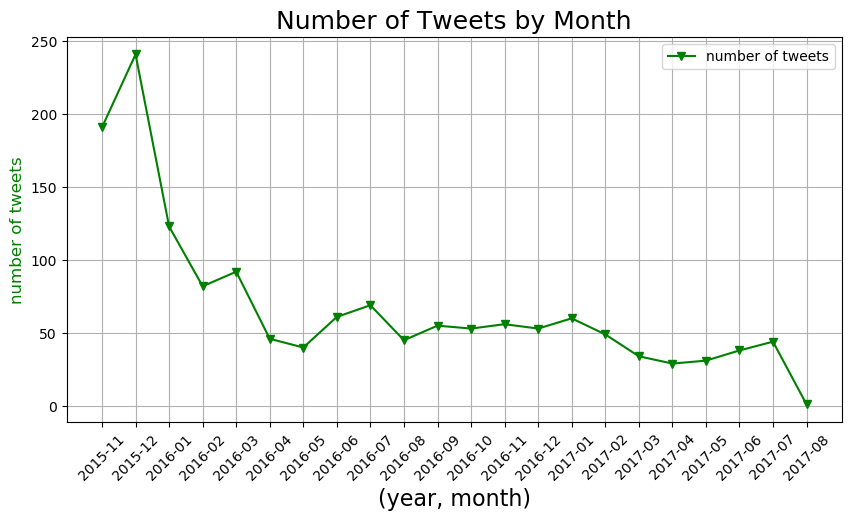

In [83]:
plt.rcdefaults() # Restore the rc params from Matplotlib's internal default style.

ax1 = monthly.tweets_count.plot(color='green',
                                marker='v',
                                grid=True,
                                label='number of tweets',
                                figsize=(10,5)) # Create the plot of first series
# Create the legend:
h1, l1 = ax1.get_legend_handles_labels()
plt.legend(h1, l1, loc=1)

# Cretae xticks and its labels:
ax1.set_xticks(range(len(monthly)));
ax1.set_xticklabels(["%s-%02d" % item for item in monthly.index.tolist()], rotation=45);

# Set axis labels:
ax1.set_xlabel('(year, month)', fontsize=16)
ax1.set_ylabel('number of tweets', fontsize=12, color='green')

# Set the title:
ax1.set_title('Number of Tweets by Month', fontsize=18)

plt.show()

#### Public reaction (retweets and favorites) by Tweet over time.

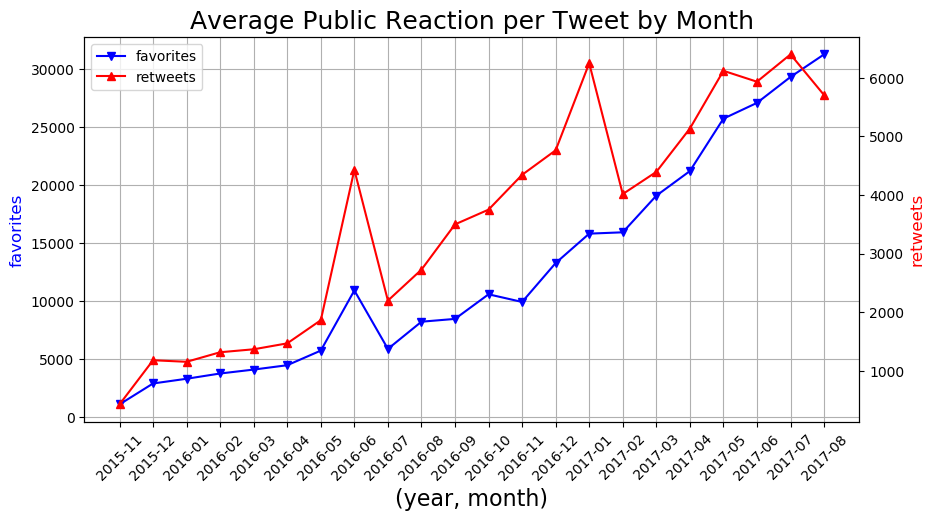

In [84]:
plt.rcdefaults() # Restore the rc params from Matplotlib's internal default style.

ax1 = monthly.favorite_by_tweet.plot(color='blue',
                                     marker='v',
                                     grid=True,
                                     label='favorites',
                                     figsize=(10,5)) # Create the plot of first series

ax2 = monthly.retweet_by_tweet.plot(color='red',
                                    marker='^',
                                    grid=True,
                                    secondary_y=True,
                                    label='retweets') # Create the plot of the second series

# Create the legend:
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1+h2, l1+l2, loc=2)

# Cretae xticks and its labels:
ax1.set_xticks(range(len(monthly)));
ax1.set_xticklabels(["%s-%02d" % item for item in monthly.index.tolist()], rotation=45);

# Set axis labels:
ax1.set_xlabel('(year, month)', fontsize=16)
ax1.set_ylabel('favorites', fontsize=12, color='blue')
ax2.set_ylabel('retweets', fontsize=12, color='red')

# Set the title:
ax1.set_title('Average Public Reaction per Tweet by Month', fontsize=18)

plt.show()

We can see that public reaction, both retweets and favorites, has increased over time.

#### Public reaction (retweets and favorites) by Breed.

In [85]:
# Create a new data frame:
breeds = pd.DataFrame()
breeds['number_of_tweets'] = tweets.groupby('breed')['tweet_id'].count()
breeds['retweet_count'] = tweets.groupby('breed')['retweet_count'].sum()
breeds['favorite_count'] = tweets.groupby('breed')['favorite_count'].sum()
breeds['Average Rating'] = tweets.groupby('breed')['rating_numerator'].sum()/tweets.groupby('breed')['rating_denominator'].sum()

In [86]:
# Calculate by tweet:
breeds['retweet_by_tweet'] = breeds['retweet_count']/breeds['number_of_tweets'] 
breeds['favorite_by_tweet'] = breeds['favorite_count']/breeds['number_of_tweets'] 

In [87]:
breeds

,number_of_tweets,retweet_count,favorite_count,Average Rating,retweet_by_tweet,favorite_by_tweet
breed,,,,,,
Afghan Hound,4,25094,47422,1.050000,6273.500000,11855.500000
Airedale,10,11039,41734,0.950000,1103.900000,4173.400000
American Staffordshire Terrier,11,17749,63597,1.090909,1613.545455,5781.545455
Appenzeller,2,2528,13419,1.100000,1264.000000,6709.500000
Basenji,7,5832,17147,1.028571,833.142857,2449.571429
...,...,...,...,...,...,...
Welsh Springer Spaniel,3,1354,7479,0.900000,451.333333,2493.000000
West Highland White Terrier,11,10546,44116,1.009091,958.727273,4010.545455
Whippet,9,18568,71823,1.044444,2063.111111,7980.333333


In [88]:
x_val = breeds.favorite_by_tweet.tolist()
y_val = list(np.arange(len(x_val)))
labels_y = [v for v in breeds.index]
labels_x = [str(v) for v in x_val]

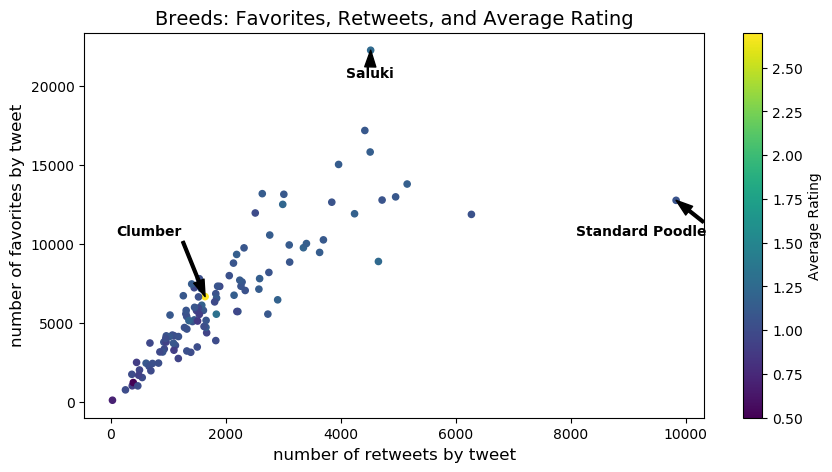

In [89]:
plt.rcdefaults() # Restore the rc params from Matplotlib's internal default style.
ax = breeds.plot.scatter(x='retweet_by_tweet', 
                         y='favorite_by_tweet', 
                         c='Average Rating', 
                         colormap='viridis',
                         figsize=(10,5),
                         grid=False)
# Set X label:
ax.set_xlabel('number of retweets by tweet', fontsize=12)
# Set Y label:
ax.set_ylabel('number of favorites by tweet', fontsize=12)
# Set the title:
ax.set_title('Breeds: Favorites, Retweets, and Average Rating', fontsize=14)

# Annotate the breed with maximum average rating:
xpos = float(breeds[breeds['Average Rating'] == breeds['Average Rating'].max()].retweet_by_tweet)
ypos = float(breeds[breeds['Average Rating'] == breeds['Average Rating'].max()].favorite_by_tweet)
breed = breeds[breeds['Average Rating'] == breeds['Average Rating'].max()].index.tolist()[0]
pos = (xpos,ypos)
ax.annotate(breed, xy=pos, xytext=(100, 10500), fontweight='bold', 
            arrowprops=dict(facecolor='black', width=2, headwidth=8))

# Annotate the breed with maximum number of retweets by tweet:
xpos = float(breeds[breeds['retweet_by_tweet'] == breeds['retweet_by_tweet'].max()].retweet_by_tweet)
ypos = float(breeds[breeds['retweet_by_tweet'] == breeds['retweet_by_tweet'].max()].favorite_by_tweet)
breed = breeds[breeds['retweet_by_tweet'] == breeds['retweet_by_tweet'].max()].index.tolist()[0]
pos = (xpos,ypos)
ax.annotate(breed, xy=pos, xytext=(8100, 10500), fontweight='bold', 
            arrowprops=dict(facecolor='black', width=2, headwidth=8))

# Annotate the breed with maximum number of favorites by tweet:
xpos = float(breeds[breeds['favorite_by_tweet'] == breeds['favorite_by_tweet'].max()].retweet_by_tweet)
ypos = float(breeds[breeds['favorite_by_tweet'] == breeds['favorite_by_tweet'].max()].favorite_by_tweet)
breed = breeds[breeds['favorite_by_tweet'] == breeds['favorite_by_tweet'].max()].index.tolist()[0]
pos = (xpos,ypos)
ax.annotate(breed, xy=pos, xytext=(4100, 20500), fontweight='bold', 
            arrowprops=dict(facecolor='black', width=2, headwidth=8));

In [90]:
breeds[breeds['Average Rating'] == breeds['Average Rating'].max()]

,number_of_tweets,retweet_count,favorite_count,Average Rating,retweet_by_tweet,favorite_by_tweet
breed,,,,,,
Clumber,1,1643,6654,2.7,1643.0,6654.0


In [91]:
xpos = float(breeds[breeds['Average Rating'] == breeds['Average Rating'].max()].retweet_by_tweet)
ypos = float(breeds[breeds['Average Rating'] == breeds['Average Rating'].max()].favorite_by_tweet)
pos = (xpos,ypos)

<a id='conclusion'></a>
## Conclusion

All data was gathered, assessed an cleaned. The analysis was performed and some visualizations were provided. Everything is better described in the file `wrangle_report.pdf`. The file `act_report.pdf` conveys the insights obtained from visualizations.